<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/2348556_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya 2348556

###Importing libraries.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler as scaler
from scipy.stats import chi2_contingency

###Loading the dataset.

In [174]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/tests/datasets/2015 - 2015.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


###Finding missing values.

In [175]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

*Inference* - No missing values are there.

###Binning for Happiness.

In [176]:
df['Happy Bins'] = pd.cut(df['Happiness Score'], bins = 3, labels = ['Low Happiness', 'Medium Happiness', 'High Happiness'])

In [177]:
df.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happy Bins
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367,Medium Happiness
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435,Medium Happiness
102,Lebanon,Middle East and Northern Africa,103,4.839,0.04337,1.02564,0.80001,0.83947,0.33916,0.04582,0.21854,1.57059,Medium Happiness
21,Oman,Middle East and Northern Africa,22,6.853,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489,High Happiness
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805,Low Happiness
110,Ukraine,Central and Eastern Europe,111,4.681,0.04412,0.79907,1.20278,0.67390,0.25123,0.02961,0.15275,1.57140,Medium Happiness
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017,Medium Happiness
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142,High Happiness
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,Low Happiness
107,Palestinian Territories,Middle East and Northern Africa,108,4.715,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,0.11251,2.04384,Medium Happiness


###One-Hot Encode Region

In [178]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [179]:
copy = df['Region']

In [180]:
df = pd.get_dummies(df, columns=['Region'])
df['Region'] = copy
df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Region
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,0,0,0,0,0,0,0,0,1,Western Europe
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,0,0,0,0,0,0,0,0,1,Western Europe
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,0,0,0,0,0,0,0,0,1,Western Europe
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,0,0,0,0,0,0,0,0,1,Western Europe
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,0,0,0,0,1,0,0,0,0,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,...,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa
154,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,...,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa
155,Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,...,0,0,0,1,0,0,0,0,0,Middle East and Northern Africa
156,Burundi,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,...,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa


###Normalizing the Economy (GDP per Capita) column

In [181]:
scale = scaler()
df[['Economy (GDP per Capita)']] = scale.fit_transform(df[['Economy (GDP per Capita)']])

In [182]:
df.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe,Region
0,Switzerland,1,7.587,0.03411,0.826132,1.34951,0.94143,0.66557,0.41978,0.29678,...,0,0,0,0,0,0,0,0,1,Western Europe
1,Iceland,2,7.561,0.04884,0.770412,1.40223,0.94784,0.62877,0.14145,0.43630,...,0,0,0,0,0,0,0,0,1,Western Europe
2,Denmark,3,7.527,0.03328,0.784113,1.36058,0.87464,0.64938,0.48357,0.34139,...,0,0,0,0,0,0,0,0,1,Western Europe
3,Norway,4,7.522,0.03880,0.863099,1.33095,0.88521,0.66973,0.36503,0.34699,...,0,0,0,0,0,0,0,0,1,Western Europe
4,Canada,5,7.427,0.03553,0.784592,1.32261,0.90563,0.63297,0.32957,0.45811,...,0,0,0,0,1,0,0,0,0,North America


###Performing $chi^2$ test between Region and Happiness Rank.

Prepare the contingency table

In [183]:
df.loc[:, df.columns.str.startswith('Region_')]

,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,0,1,0


In [184]:
# compare = pd.crosstab([df['Region_Australia and New Zealand'],
#                        df['Region_Central and Eastern Europe'],
#                        df['Region_Eastern Asia'],
#                        df['Region_Latin America and Caribbean'],
#                        df['Region_Middle East and Northern Africa'],
#                        df['Region_North America'],
#                        df['Region_Southeastern Asia'],
#                        df['Region_Southern Asia'],
#                        df['Region_Sub-Saharan Africa'],
#                        df['Region_Western Europe']], df['Happiness Rank'])
compare = pd.crosstab(df['Region'], df['Happiness Rank'])

In [185]:
compare

Happiness Rank,1,2,3,4,5,6,7,8,9,10,...,149,150,151,152,153,154,155,156,157,158
Region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Central and Eastern Europe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eastern Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Latin America and Caribbean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Middle East and Northern Africa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
North America,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Southeastern Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Southern Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Sub-Saharan Africa,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,0,1,1


In [186]:
chisq, p, dof, ex = chi2_contingency(compare)
print(f'Chi_square value {chisq}\np-value {p} \ndegrees of freedom {dof} \nexpected {ex}')

Chi_square value 1415.3258620689655
p-value 0.4107040079831256 
degrees of freedom 1404 
expected [[0.01265823 0.01265823 0.01265823 ... 0.01265823 0.01265823 0.01265823]
 [0.1835443  0.1835443  0.1835443  ... 0.1835443  0.1835443  0.1835443 ]
 [0.03797468 0.03797468 0.03797468 ... 0.03797468 0.03797468 0.03797468]
 ...
 [0.0443038  0.0443038  0.0443038  ... 0.0443038  0.0443038  0.0443038 ]
 [0.25316456 0.25316456 0.25316456 ... 0.25316456 0.25316456 0.25316456]
 [0.13291139 0.13291139 0.13291139 ... 0.13291139 0.13291139 0.13291139]]


$\because p < 0.5$ we can say that the corresponding columns are independent.

###Covariance Matrix for a subset of numerical columns.

In [187]:
cov = np.cov(df['Economy (GDP per Capita)'], [df['Family'], df['Health (Life Expectancy)']])
cov

array([[0.05686972, 0.04191405, 0.04810816],
       [0.04191405, 0.07418492, 0.03574136],
       [0.04810816, 0.03574136, 0.06104742]])

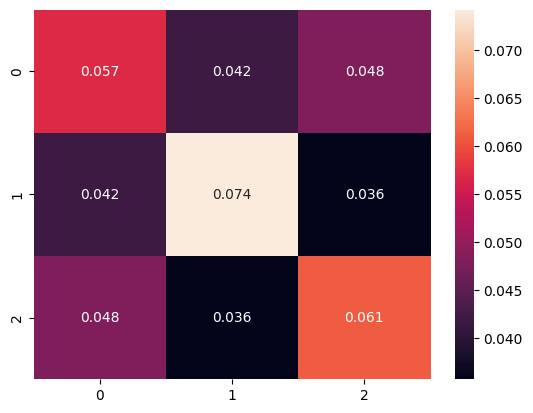

In [188]:
sb.heatmap(cov, annot=True);

###Visualizations

In [189]:
happy_group = df['Happy Bins'].value_counts()

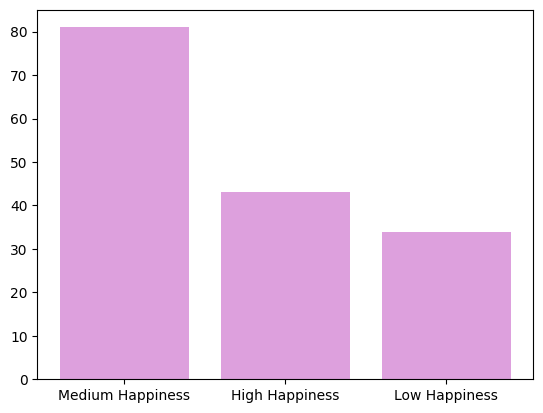

In [190]:
pt.bar(happy_group.index, happy_group.values, color='plum');

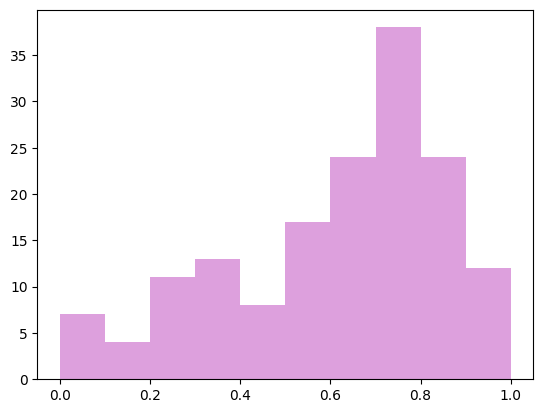

In [191]:
pt.hist(scale.fit_transform(df[['Health (Life Expectancy)']]), color='plum');